# 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import scipy.stats as stats

# 2. Import dataset

The datasets are read, and general information about them is shown.

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 3. EDA and data completion

We can see that the dataset consists on 11 columns, and that the target is a binary column, showing wether the passenger survived (1) or not (0). Regarding the columns:
1) PassengerId: Unique for every passenger, does not bring any predictive value. To drop.
2) Pclass: the class of the paseenger. It could be possible that pasengers in better classess have a higher chance of surviving.
3) Name: In itself doesn't help to predict. The title of the person could be informative, and some implementations use it, but I think that information it's already present in the combination of the age and sex columns. To drop.
4) Sex: It is informative because women have a higher survival rate than men, as will be shown later.
5) Age: It is informative because certain age groups have a higher survival rate, as will be shown later.
6) SibSp: the presence of familiy memmbers could be informative.
7) Parch: The same as above.
8) Ticket: Not informative, and with several duplicates. To drop.
9) Fare: It is likely that passenger with higher fares have a higher chance of surviving.
10) Cabin: While there maybe some correlation between the cabin occupied and the percentage of surviving, the high rate of null values make this column useless. To drop.
11) Embarked: There could be correlation between the port of porigin, and the chance of survival, as shown later.

#### PClass
Passengers in the best classess have a higher chance of survival.

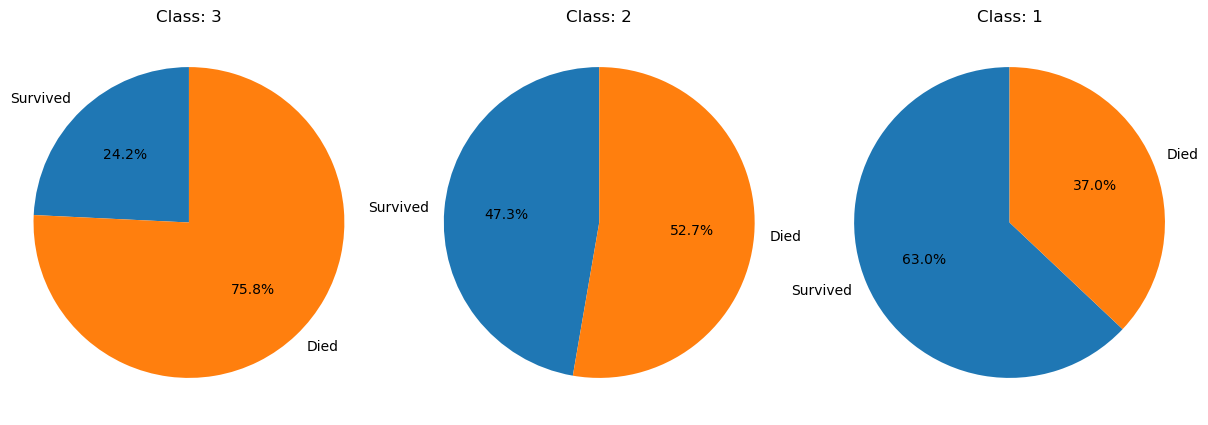

In [10]:
result_df = train_data.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
result_df['percentage'] = result_df[1] / (result_df[0] + result_df[1]) * 100
result_df.head()


fig, axes = plt.subplots(nrows=1, ncols=result_df['percentage'].nunique(), figsize=(15, 5))

for i, (percentage_value, data) in enumerate(result_df.groupby('percentage')):
    data = data.reset_index()
    labels = ['Survived', 'Died']
    sizes = [data['percentage'][0], 100 - data['percentage'][0]]
    pclass = data['Pclass'][0]
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i].axis('equal') 
    axes[i].set_title(f'Class: {pclass}')




#### Embarked

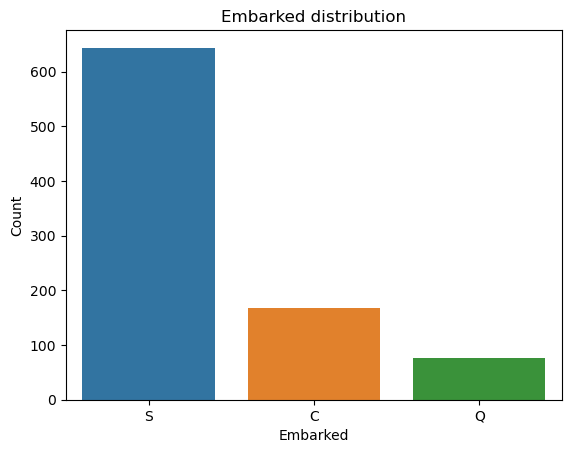

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [11]:
sns.countplot(x='Embarked', data=train_data)


plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Embarked distribution')

plt.show()
print(train_data['Embarked'].value_counts())

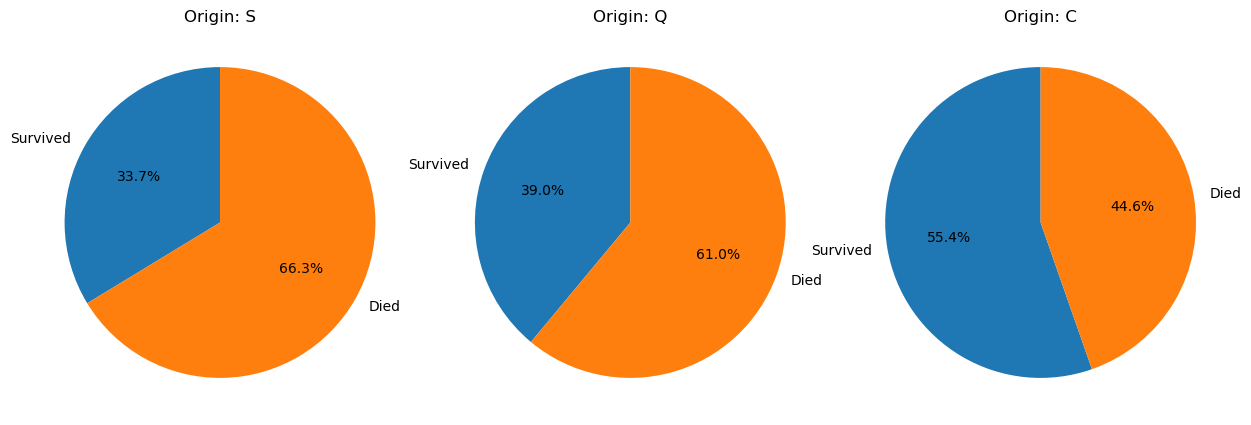

In [12]:
result_df = train_data.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)
result_df['percentage'] = result_df[1] / (result_df[0] + result_df[1]) * 100
result_df.head()


fig, axes = plt.subplots(nrows=1, ncols=result_df['percentage'].nunique(), figsize=(15, 5))

for i, (percentage_value, data) in enumerate(result_df.groupby('percentage')):
    data = data.reset_index()
    labels = ['Survived', 'Died']
    sizes = [data['percentage'][0], 100 - data['percentage'][0]]
    embarked = data['Embarked'][0]
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i].axis('equal') 
    axes[i].set_title(f'Origin: {embarked}')

It seems Embarked is an informative column, given the different percentages of survival between the different ports of origin. There are two entries that are missing values in that column. Since they are only two of them, one option would be just deleting them from the data set, but I opted for a more general solution, that could handle cases when the number of missing entries is higher, and imputed the missing values using K-Nearest-Neighbours.

In [13]:
columns_to_delete= ['Name', 'PassengerId', 'Cabin','Ticket']
passengerIds = test_data['PassengerId']
train_data = train_data.drop(columns=columns_to_delete)
test_data = test_data.drop(columns=columns_to_delete)

In [14]:
train_data['Embarked_map'] = train_data['Embarked'].map({'S':0, 'C':1, 'Q':2})
columns_to_predict_embarked = ['Fare','Pclass','Embarked_map']
imputer_data = train_data[columns_to_predict_embarked]
imputer = KNNImputer(n_neighbors=4)

imputed_data = pd.DataFrame(imputer.fit_transform(imputer_data), columns=columns_to_predict_embarked)
imputed_labels = pd.unique(train_data['Embarked'].dropna())
train_data['Embarked'] = [imputed_labels[int(i)] if not np.isnan(i) else np.nan for i in imputed_data['Embarked_map']]
train_data = train_data.drop(columns=['Embarked_map'])



In [15]:
train_data.iloc[829]

Survived         1
Pclass           1
Sex         female
Age           62.0
SibSp            0
Parch            0
Fare          80.0
Embarked         S
Name: 829, dtype: object

#### Fare
In the test set, one entry is missing the Fare value. I went for a simpler approach to this, and assigned it the average value of Fare from the passanger of the same Pclass and Embarked columns. 

In [16]:
test_data[test_data['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60.5,0,0,NaN,S


In [17]:
grouped_means = test_data.groupby(['Pclass', 'Embarked'])['Fare'].transform('mean')
test_data['Fare'] = test_data['Fare'].fillna(grouped_means)

#### Sex
Sex is a very informative varible: the percentage of survival is much higher among women than men

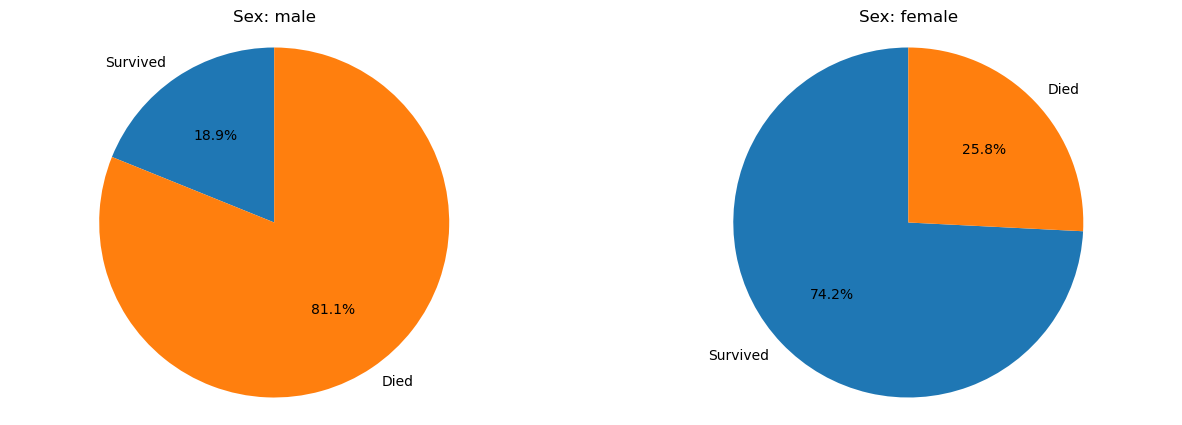

In [18]:
result_df = train_data.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)
result_df['percentage'] = result_df[1] / (result_df[0] + result_df[1]) * 100
result_df.head()


fig, axes = plt.subplots(nrows=1, ncols=result_df['percentage'].nunique(), figsize=(15, 5))

for i, (percentage_value, data) in enumerate(result_df.groupby('percentage')):
    data = data.reset_index()
    labels = ['Survived', 'Died']
    sizes = [data['percentage'][0], 100 - data['percentage'][0]]
    sex = data['Sex'][0]
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i].axis('equal') 
    axes[i].set_title(f'Sex: {sex}')

In [19]:
train_data = pd.get_dummies(train_data, columns=['Sex'], dtype=float)
test_data = pd.get_dummies(test_data, columns=['Sex'], dtype=float)

In [20]:
train_data = pd.get_dummies(train_data, columns=['Embarked'], dtype=float)
test_data = pd.get_dummies(test_data, columns=['Embarked'], dtype=float)

#### Age
Age is also a very informative value, with certain age ranges having better survival chances than others. Also, more important than the absolute age value, is the interval that value belongs to, so a column with the interval value will be added to be used later in the classification.

Text(0.5, 1.0, 'Distribution of Age')

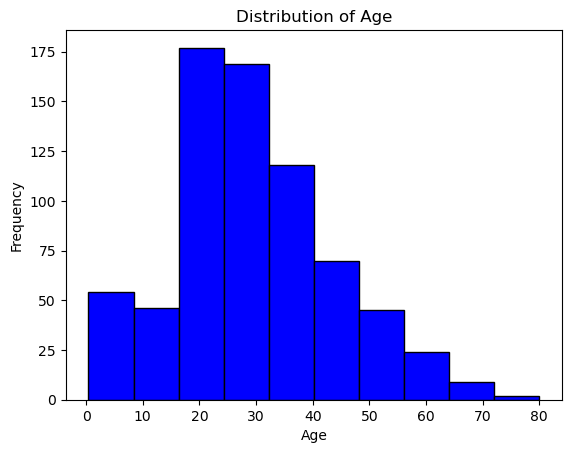

In [21]:
plt.hist(train_data['Age'], bins=10, color='blue', edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Age')

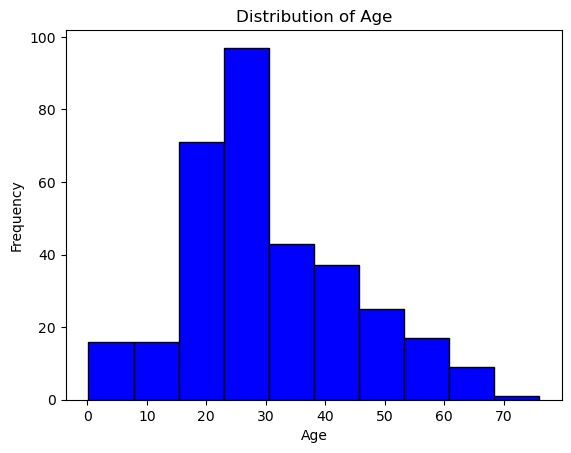

In [22]:
#delete
plt.hist(test_data['Age'], bins=10, color='blue', edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

But before that, the issue of missing Age values needs to be resolved. I will use the IterativeImputer, which tries to predict the missing values using the rest of the columns iteratively.

In [23]:
missing_data = train_data.isna()
train_data_copy = train_data.copy()
imputer = IterativeImputer(min_value=train_data['Age'].min(), max_value=train_data['Age'].max())

imputed_train = pd.DataFrame(imputer.fit_transform(train_data_copy))
train_data['Age'] = imputed_train.iloc[:,2]


Text(0.5, 1.0, 'Distribution of Age')

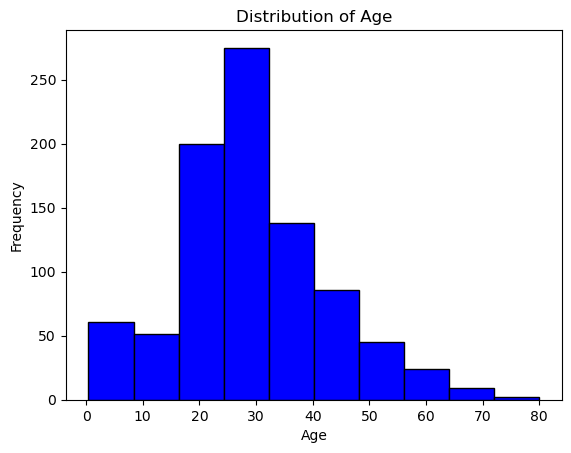

In [24]:
plt.hist(train_data['Age'], bins=10, color='blue', edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

In [33]:
test_data_copy = test_data.copy()
imputer = IterativeImputer(min_value=test_data['Age'].min(), max_value=test_data['Age'].max())

imputed_test = pd.DataFrame(imputer.fit_transform(test_data_copy))


In [37]:
test_data['Age'] = imputed_test.iloc[:,1]

In [39]:
age_bins = [0, 10, 20, 30, 40, 60, float('inf')]  
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-60','60+']
train_data['AgeInterval'] = pd.cut(train_data['Age'], bins=age_bins, labels=age_labels, right=False)
test_data['AgeInterval'] = pd.cut(test_data['Age'], bins=age_bins, labels=age_labels, right=False)

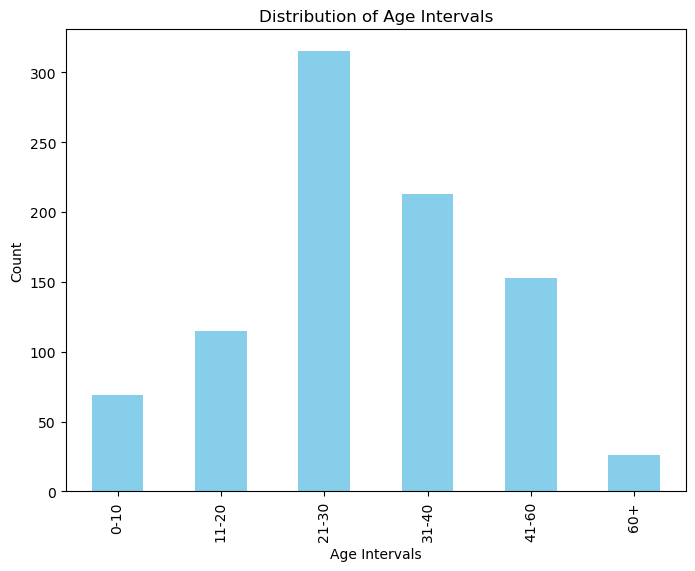

In [40]:
plt.figure(figsize=(8, 6))
train_data['AgeInterval'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Age Intervals')
plt.xlabel('Age Intervals')
plt.ylabel('Count')
plt.show()

In [42]:
train_data = pd.get_dummies(train_data, columns=['AgeInterval'], dtype=float)
test_data = pd.get_dummies(test_data, columns=['AgeInterval'], dtype=float)

In [43]:
columns_to_delete = ['Age']
train_data = train_data.drop(columns=columns_to_delete)
test_data = test_data.drop(columns=columns_to_delete)


In [44]:
train_data.corr()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeInterval_0-10,AgeInterval_11-20,AgeInterval_21-30,AgeInterval_31-40,AgeInterval_41-60,AgeInterval_60+
Survived,1.000000,-0.338481,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.149683,0.099423,0.033443,-0.081627,0.044599,-0.028928,-0.040857
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.074053,0.124137,0.102180,0.269091,-0.122001,-0.310637,-0.159798
SibSp,-0.035322,0.083081,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.068734,0.513997,0.093714,-0.167741,-0.110787,-0.089161,-0.045971
Parch,0.081629,0.018443,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.060814,0.389192,0.054503,-0.166695,-0.082574,-0.012500,-0.015904
Fare,0.257307,-0.549500,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.162184,0.013571,-0.007242,-0.145074,0.058467,0.097051,0.039319
Sex_female,0.543351,-0.131900,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.119224,0.076324,0.087397,-0.054107,-0.005861,-0.024414,-0.072063
Sex_male,-0.543351,0.131900,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.119224,-0.076324,-0.087397,0.054107,0.005861,0.024414,0.072063
Embarked_C,0.168240,-0.243292,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.782742,-0.043048,0.028383,-0.002364,-0.034724,0.046802,0.001665
Embarked_Q,0.003650,0.221009,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.499421,-0.029334,-0.023092,0.014854,0.108567,-0.097675,-0.005860
Embarked_S,-0.149683,0.074053,0.068734,0.060814,-0.162184,-0.119224,0.119224,-0.782742,-0.499421,1.000000,0.056171,-0.010333,-0.007276,-0.037901,0.020466,0.002229


# 4. Classification

In [45]:
y_train = train_data['Survived']
x_train = train_data.drop(['Survived'], axis=1)
x_test = test_data.copy()

In [46]:
from tabpfn import TabPFNClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV, cross_val_score

#### XGB

In [47]:
param_xgb = {
    'learning_rate': [0.01, 0.1, 0.2,0.5,0.7],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7,10,14],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0.1, 0.3, 1, 3, 5, 10]
}

xgb = XGBClassifier(objective='binary:logistic',
                          seed=42)
xgb_rndm = RandomizedSearchCV(xgb, param_xgb, n_iter=300, cv=5, scoring='accuracy', verbose=1, random_state=42)
xgb_rndm.fit(x_train, y_train)




Fitting 5 folds for each of 300 candidates, totalling 1500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=300,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'gamma': [0.1, 0.3, 1, 3, 5, 10],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.5,
                                                          0.7],
                                        'max_depth': [3, 5, 7, 10, 14],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [48]:
xgb_best = xgb_rndm.best_estimator_
best_params = xgb_rndm.best_params_
best_params


{'subsample': 0.8,
 'n_estimators': 100,
 'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 3,
 'colsample_bytree': 1.0}

In [49]:
idx_xgb = xgb_rndm.cv_results_['rank_test_score'].argmin()
xgb_rndm.cv_results_['mean_test_score'][idx_xgb]

0.8496516226225597

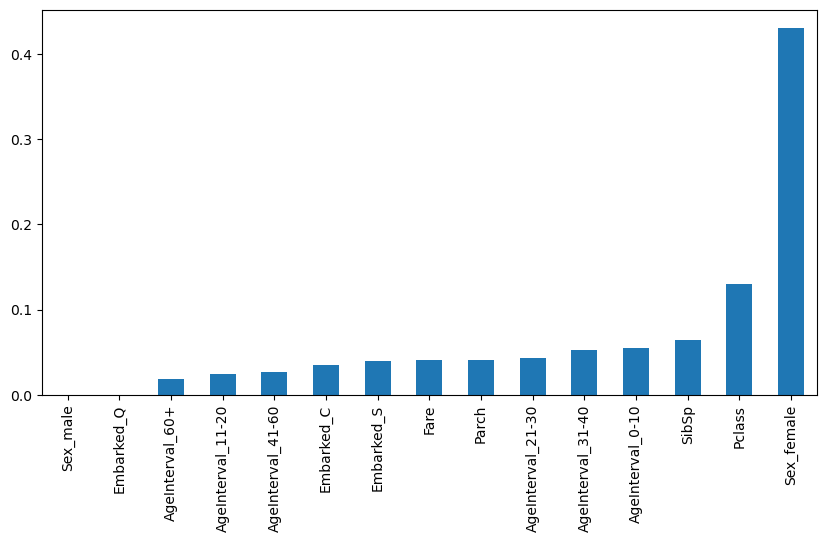

In [50]:
pd.Series(xgb_best.feature_importances_, index=xgb_best.feature_names_in_).sort_values().plot.bar(figsize=(10,5))
plt.show()

In [51]:
xgb_test_predictions = xgb_best.predict(x_test)
xgb_submission = pd.DataFrame({ 'PassengerId': passengerIds,
                            'Survived': xgb_test_predictions })
xgb_submission.to_csv("xgb_submission.csv", index=False)

XGB Public Score: 0.76794

#### LGBM

In [54]:
param_lgbm = {
    'boosting': ['dart', 'goss', 'gbdt'],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3,5,10,15,50],
    'learning_rate': [0.01, 0.03, 0.01, 0.03, 0.1, 0.3, 1],
    'min_child_samples' : [5,10,15,25,50],
    'subsample': [0.5, 0.75, 0.95, 1.0],
    'num_leaves': [2,5, 20, 30,50]
}

lgbm = LGBMClassifier(objective='binary',
                          verbose=-1)
lgbm_rndm = RandomizedSearchCV(lgbm, param_lgbm, n_iter=300, cv=5, scoring='accuracy', verbose=1, random_state=42)
lgbm_rndm.fit(x_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(objective='binary', verbose=-1),
                   n_iter=300,
                   param_distributions={'boosting': ['dart', 'goss', 'gbdt'],
                                        'learning_rate': [0.01, 0.03, 0.01,
                                                          0.03, 0.1, 0.3, 1],
                                        'max_depth': [3, 5, 10, 15, 50],
                                        'min_child_samples': [5, 10, 15, 25,
                                                              50],
                                        'n_estimators': [50, 100, 150, 200],
                                        'num_leaves': [2, 5, 20, 30, 50],
                                        'subsample': [0.5, 0.75, 0.95, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [55]:
lgbm_best = lgbm_rndm.best_estimator_
best_params = lgbm_rndm.best_params_
best_params

{'subsample': 0.95,
 'num_leaves': 30,
 'n_estimators': 200,
 'min_child_samples': 15,
 'max_depth': 50,
 'learning_rate': 0.03,
 'boosting': 'goss'}

In [56]:
idx_lgbm = lgbm_rndm.cv_results_['rank_test_score'].argmin()
lgbm_rndm.cv_results_['mean_test_score'][idx_lgbm]

0.8485154729772141

In [58]:
lgbm_test_predictions = lgbm_best.predict(x_test)
lgbm_submission = pd.DataFrame({ 'PassengerId': passengerIds,
                            'Survived': xgb_test_predictions })
lgbm_submission.to_csv("lgbm_submission.csv", index=False)

LGBM Public Score: 0.76794


#### TabPFNClassifier

In [67]:
tabPFN = TabPFNClassifier(device='cpu')
tabPFN.fit(x_train, y_train)

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


TabPFNClassifier()

In [68]:
tabPFN.predict(x_test)

C:\Users\Ego\anaconda3\envs\mlenv\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [69]:
tabPFN_test_predictions = tabPFN.predict(x_test)
tabPFN_submission = pd.DataFrame({ 'PassengerId': passengerIds,
                            'Survived': tabPFN_test_predictions })
tabPFN_submission.to_csv("tabPFN_submission.csv", index=False)

C:\Users\Ego\anaconda3\envs\mlenv\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


TabPFN Public Score: 0.77511

In [70]:
merged_df = pd.merge(tabPFN_submission, lgbm_submission, on='PassengerId')
merged_df = pd.merge(merged_df, xgb_submission, on='PassengerId')

In [74]:
merged_df.head(25)

,PassengerId,Survived_x,Survived_y,Survived
0,892,0,0,0
1,893,0,0,0
2,894,0,0,0
3,895,0,0,0
4,896,0,0,0
5,897,0,0,0
6,898,0,0,0
7,899,0,0,0
8,900,1,1,1
9,901,0,0,0


In [77]:
def majority_vote(row):
    counts = row.value_counts()
    return counts.idxmax()

merged_df['majority_vote'] = merged_df[['Survived_x', 'Survived_y', 'Survived']].apply(majority_vote, axis=1)


In [78]:
result_df = merged_df[['PassengerId', 'majority_vote']]
result_df.columns = ['PassengerId', 'Survived']

In [80]:
result_df.to_csv("mixed_submission.csv", index=False)